### Repository - http://db.csail.mit.edu/labdata/labdata.html



## Analysis of sensor readings from sensors deployed in Intel Berkley Research lab

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [18]:
color = sns.color_palette()
%matplotlib inline

In [11]:
os.chdir('A:\Python\Site1001\Sensor-input')

os.listdir()

['connectivity.txt', 'data.txt', 'mote_locs.txt']

In [123]:
data = pd.read_csv('data.txt',header = None,sep = " ")

In [10]:
data.head(5)

,0,1,2,3,4,5,6,7
0,2004-03-31,03:38:15.757551,2,1.0,122.1530,-3.91901,11.04,2.03397
1,2004-02-28,00:59:16.02785,3,1.0,19.9884,37.09330,45.08,2.69964
2,2004-02-28,01:03:16.33393,11,1.0,19.3024,38.46290,45.08,2.68742
3,2004-02-28,01:06:16.013453,17,1.0,19.1652,38.80390,45.08,2.68742
4,2004-02-28,01:06:46.778088,18,1.0,19.1750,38.83790,45.08,2.69964


In [125]:
#mote - sensor
#Renaming the columns
data.columns = ["date","time","epoch","moteid","temperature","humidity","light","voltage"]

In [68]:
data.head(5)

,date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.000,122.153,-3.919,11.040,2.034
1,2004-02-28,00:59:16.02785,3,1.000,19.988,37.093,45.080,2.700
2,2004-02-28,01:03:16.33393,11,1.000,19.302,38.463,45.080,2.687
3,2004-02-28,01:06:16.013453,17,1.000,19.165,38.804,45.080,2.687
4,2004-02-28,01:06:46.778088,18,1.000,19.175,38.838,45.080,2.700


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2313682 entries, 0 to 2313681
Data columns (total 8 columns):
date           object
time           object
epoch          int64
moteid         float64
temperature    float64
humidity       float64
light          float64
voltage        float64
dtypes: float64(5), int64(1), object(2)
memory usage: 141.2+ MB


In [17]:
data.shape

(2313682, 8)

In [29]:
data.isnull().sum()

date               0
time               0
epoch              0
moteid           526
temperature      901
humidity         902
light          93878
voltage          526
dtype: int64

In [ ]:
#TO verify if moteid is in between 1 to 54

In [52]:
print("Number of unique values:{0}".format(data['moteid'].nunique()))
print("Max mote id:{0}".format(data['moteid'].max()))
print("Min mote id:{0}".format(data['moteid'].min()))

Number of unique values:61
Max mote id:65407.0
Min mote id:1.0


### Observation about the motes
* mote values are found to be out of range
* 0.42% of the values are found to affected
* The indices of the samples are as shown below

In [316]:
mask = data.moteid>54 

In [ ]:
#To find out the indices containing invalid mote id's

In [58]:
mask[mask].index

Int64Index([2303290, 2303291, 2303292, 2303293, 2303294, 2303295, 2303296,
            2303297, 2303298, 2303299,
            ...
            2313146, 2313147, 2313148, 2313149, 2313150, 2313151, 2313152,
            2313153, 2313154, 2313155],
           dtype='int64', length=9866)

In [320]:
(len(mask[mask].index)/data.shape[0])*100

0.4264198796550261

In [64]:
#To have a look at a sample index
data.loc[2313154,'moteid'] 

33117.0

In [65]:
#to check if the voltage is in between 2 to 3

In [71]:
print("Max voltage:{0}".format(data['voltage'].max()))

print("Min voltage:{0}".format(data['voltage'].min()))

#Evident with the box plot

Max voltage:18.56
Min voltage:0.00910083


In [26]:
split = 4
sensor_data = data.iloc[:,split:]

In [92]:
#data.describe()

,epoch,moteid,temperature,humidity,light,voltage
count,2313682.000,2313156.000,2312781.000,2312780.000,2219804.000,2313156.000
mean,33039.931,28.544,39.207,33.908,407.211,2.493
std,18368.524,50.624,37.419,17.322,539.428,0.180
min,0.000,1.000,-38.400,-8983.130,0.000,0.009
25%,17572.000,17.000,20.410,31.878,39.560,2.385
50%,33327.000,29.000,22.438,39.280,158.240,2.527
75%,47789.000,41.000,27.025,43.586,537.280,2.628
max,65535.000,65407.000,385.568,137.512,1847.360,18.560


In [27]:
sensor_data.describe()

,temperature,humidity,light,voltage
count,2312781.000,2312780.000,2219804.000,2313156.000
mean,39.207,33.908,407.211,2.493
std,37.419,17.322,539.428,0.180
min,-38.400,-8983.130,0.000,0.009
25%,20.410,31.878,39.560,2.385
50%,22.438,39.280,158.240,2.527
75%,27.025,43.586,537.280,2.628
max,385.568,137.512,1847.360,18.560


In [30]:
#Visualizing the Sensor data

In [31]:
sensor_columns = sensor_data.columns

In [32]:
n_rows = 2 
n_cols = 2


In [38]:
sensor_columns

Index(['temperature', 'humidity', 'light', 'voltage'], dtype='object')

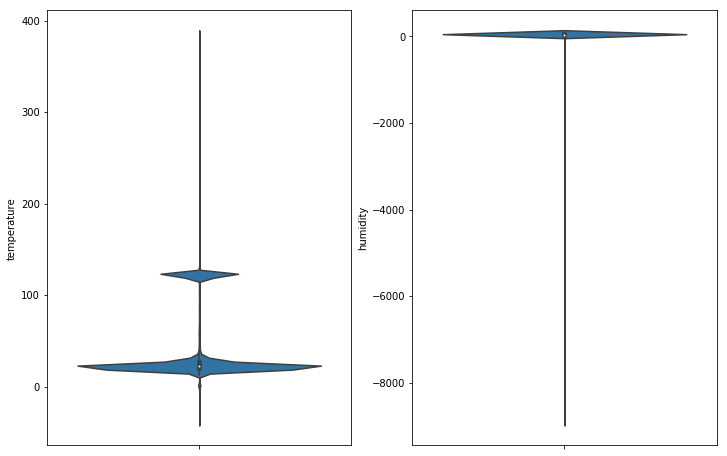

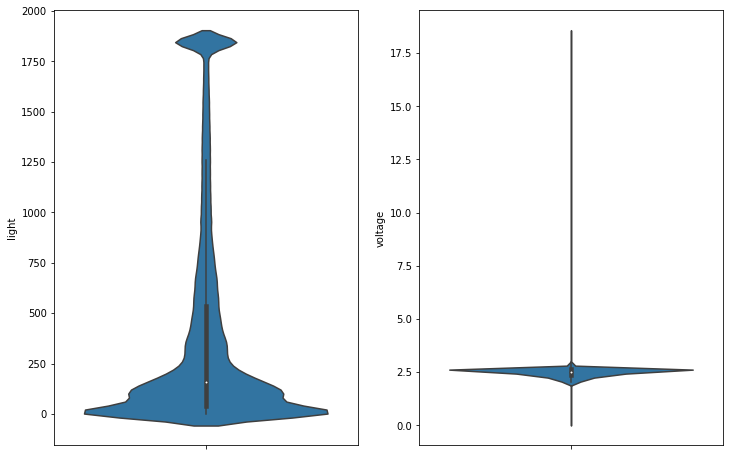

In [39]:
#Combination of box plot and kernel density function
for i in range(n_rows):
    fg, ax  =plt.subplots(ncols = n_cols,nrows = 1,figsize = (12,8))
    for j in range(n_cols):
        sns.violinplot(y = sensor_columns[i * n_cols + j],data = sensor_data, ax = ax[j])
plt.show()
        

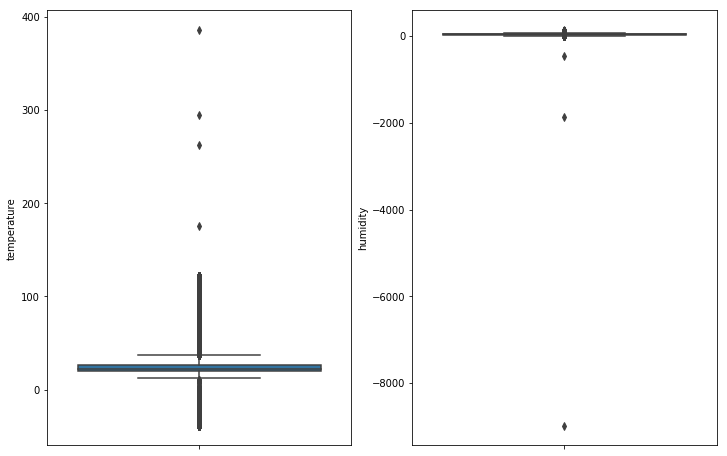

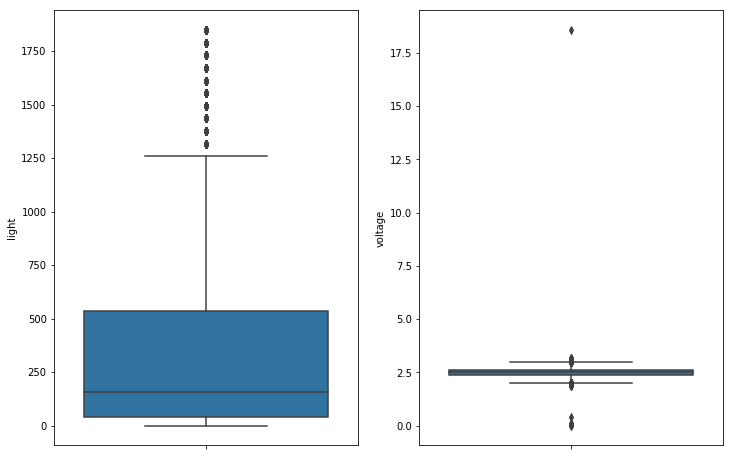

In [40]:
for i in range(n_rows):
    fg, ax  =plt.subplots(ncols = n_cols,nrows = 1,figsize = (12,8))
    for j in range(n_cols):
        sns.boxplot(y = sensor_columns[i * n_cols + j],data = sensor_data, ax = ax[j])
plt.show()
        

### A few things to be inferred from the box and the violin plots
* The box plot for voltage is short.The voltage values are in agreement with each other. Also the values are clustered around 2.5 V
* Same observation for humidity. The figure seems out of focused due to the large magnitude of the outlier
* The data for light seems to be right skewed
* The majority of temperature values are concentrated between (15 to 35) units. There are few around 120 units


#### Statement - " Two readings from the same epoch number were produced from different motes at the same time"

In [74]:
data.groupby('epoch')['moteid'].count()

epoch
0         6
1         2
2        48
3        31
4        30
5        26
6        26
7        27
8        24
9        24
10       19
11       19
12       19
13       18
14       19
15       23
16       26
17       18
18       31
19       29
20       32
21       36
22       31
23       35
24       36
25       37
26       38
27       33
28       39
29       38
         ..
65506    28
65507    28
65508    31
65509    28
65510    28
65511    25
65512    30
65513    27
65514    27
65515    23
65516    29
65517    27
65518    32
65519    25
65520    32
65521    25
65522    21
65523    25
65524    27
65525    30
65526    25
65527    25
65528    27
65529    27
65530    25
65531    31
65532    31
65533    29
65534    27
65535    30
Name: moteid, Length: 65536, dtype: int64

In [82]:
epoch_motedata = data.groupby('epoch')['moteid'].aggregate("count")

type(epoch_motedata)

epoch_motedata

In [85]:
epoch_motedata_df = epoch_motedata.reset_index()

In [90]:
epoch_motedata_df['moteid'].sum
#matches with the total number of NON-NAN values for moteid

2313156

In [88]:
epoch_motedata_df.head(5)

,epoch,moteid
0,0,6
1,1,2
2,2,48
3,3,31
4,4,30


In [87]:
epoch_motedata_df.columns

Index(['epoch', 'moteid'], dtype='object')

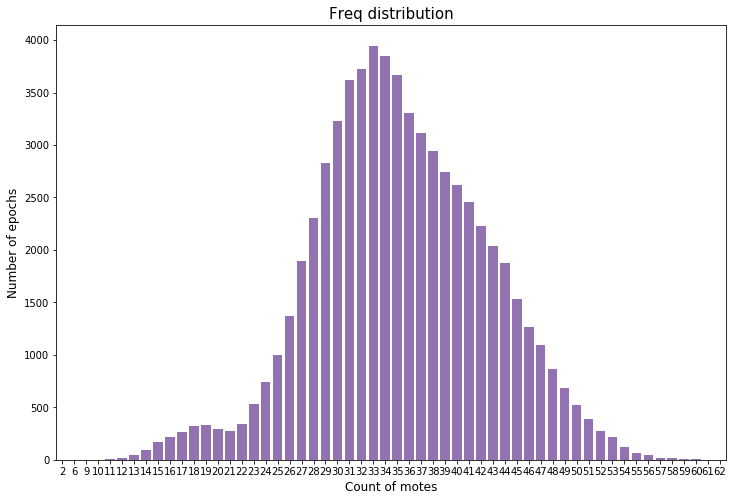

In [95]:
plt.figure(figsize = (12,8))
sns.countplot(x = 'moteid',data = epoch_motedata_df,color = color[4])
plt.ylabel('Number of epochs',fontsize = 12)
plt.xlabel('Count of motes',fontsize = 12)
plt.title('Freq distribution',fontsize = 15)
plt.show()

### From the frequency distribution,
* almost close to 4000 epochs have values being contributed by as many as 32 motes
* A large number of iterations have the sensor values from around 28 to 45 motes
* Only in case of fewer number of iterations, there are values from more than 50 motes/less than 20 motes 


In [99]:
# to find the correlation among sensor data
parameters_correlation = sensor_data.corr()

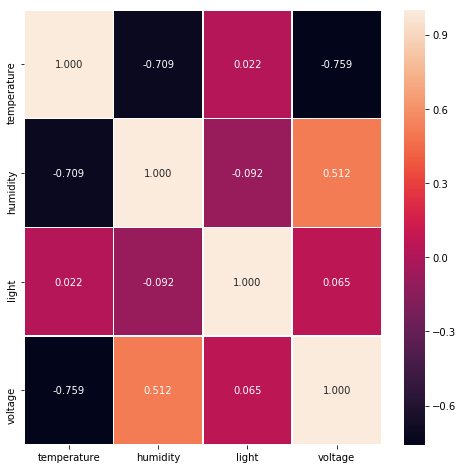

In [110]:
f,ax = plt.subplots(figsize = (8,8))

sns.heatmap(data = parameters_correlation,annot = True,linewidths = 0.5,fmt = '.3f',ax = ax)

* From the correlation plot, there is a negative relation between humidity and temperature. As one quantity increase, the other decreases. Similar with temperature and voltage values. 
* The other values are not too significant

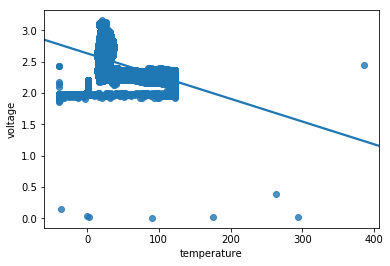

In [198]:
ax = sns.regplot(x="temperature", y="voltage", data=data)

* the negative slope of the line kind of confirms the relation between temp and voltage values established by the pearsons co-eff
* The points in the graph are like a lump because of large number of samples

In [217]:
data['Date'] = pd.to_datetime(data['date'])
#Creating a new column by converting object to datetime object
#Another option is to merge and have one single column for date and time

In [127]:
data.dtypes

date                   object
time                   object
epoch                   int64
moteid                float64
temperature           float64
humidity              float64
light                 float64
voltage               float64
Date           datetime64[ns]
dtype: object

In [128]:
del data['date']

In [129]:
data.head(5)

,time,epoch,moteid,temperature,humidity,light,voltage,Date
0,03:38:15.757551,2,1.000,122.153,-3.919,11.040,2.034,2004-03-31
1,00:59:16.02785,3,1.000,19.988,37.093,45.080,2.700,2004-02-28
2,01:03:16.33393,11,1.000,19.302,38.463,45.080,2.687,2004-02-28
3,01:06:16.013453,17,1.000,19.165,38.804,45.080,2.687,2004-02-28
4,01:06:46.778088,18,1.000,19.175,38.838,45.080,2.700,2004-02-28


In [130]:
data = data.reindex_axis(['Date','time','epoch','moteid','temperature','humidity','light','voltage'], axis=1)


In [132]:
data.head()

,Date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.000,122.153,-3.919,11.040,2.034
1,2004-02-28,00:59:16.02785,3,1.000,19.988,37.093,45.080,2.700
2,2004-02-28,01:03:16.33393,11,1.000,19.302,38.463,45.080,2.687
3,2004-02-28,01:06:16.013453,17,1.000,19.165,38.804,45.080,2.687
4,2004-02-28,01:06:46.778088,18,1.000,19.175,38.838,45.080,2.700


In [142]:
a = data.loc[1:1,"Date"]

In [146]:
a[1].year

2004

In [ ]:
#TO find the duration of the data collected

In [162]:
MaxDate = data['Date'].max()

In [163]:
MinDate = data['Date'].min()

In [174]:
(MaxDate - MinDate).days

37

In [178]:
print("Start date: {0}".format(MinDate.date()))
print("End date:{0}".format(MaxDate.date()))

Start date: 2004-02-28
End date:2004-04-05


In [170]:
print("Years:{0},Months:{1}".format(MaxDate.year - MinDate.year,MaxDate.month - MinDate.month + 1))
#in terms of months

Years:0,Months:3


In [192]:
MonthWise = data.groupby(data['Date'].map(lambda x: x.month))['moteid'].count()


In [193]:
MonthWise

Date
2     180549
3    2098184
4      34423
Name: moteid, dtype: int64

#### A few things to note from the above findings
* The data was gathered between 2004-02-28 and 2004-04-05 (yyyy-mm-dd)
* The data is available for 37 days, the bulk of which is in march
* A surprise fact is that almost 10% of the available data is gathered on Feb 28 and Feb 29


In [194]:
#Extracting values for march
mask = (data['Date'] >= '2004-3-1') & (data['Date'] < '2004-4-1')

MarchData = data.loc[mask]

In [197]:
MarchData.head(5)

,Date,time,epoch,moteid,temperature,humidity,light,voltage
0,2004-03-31,03:38:15.757551,2,1.000,122.153,-3.919,11.040,2.034
2410,2004-03-31,03:22:19.705081,4611,1.000,122.153,-3.919,10.120,2.048
2416,2004-03-31,03:26:15.556275,4619,1.000,122.153,-3.919,10.120,2.048
2500,2004-03-31,04:31:15.650149,4749,1.000,121.997,-1.419,9.200,2.013
2503,2004-03-31,04:35:02.327003,4756,1.000,121.977,-0.458,9.200,2.013


In [ ]:
# data['Date'] = data['Date'].dt.date
# MarchData['Date'] = MarchData['Date'].dt.date

In [207]:
type(data['Date'][0])

datetime.date

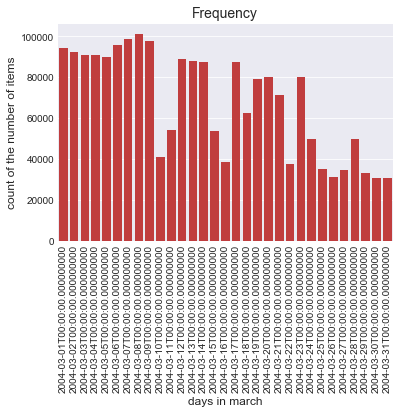

In [324]:
sns.countplot(x = "Date",data = MarchData,color = color[3])
plt.ylabel('count of the number of items',fontsize = 12)
plt.xlabel('days in march',fontsize = 12)
plt.title('Frequency',fontsize = 14)
plt.xticks(rotation= 'vertical')
plt.show()

* A large number of values are recorded in the first 9 days of March
* Very few values during the end of march

### Variations of sensor values in March

In [230]:
# COnverting string into time object

In [274]:
data['CovnHour'] = pd.to_datetime(data['time'],format= '%H:%M:%S.%f',infer_datetime_format=True)
#allow the framework to infer the date
#all the timestamps are converted to datetime where the current date is appended
#discard the current date
data['CovnHour'] = data['CovnHour'].dt.time

data['CovnHour']

In [280]:
del data['time']

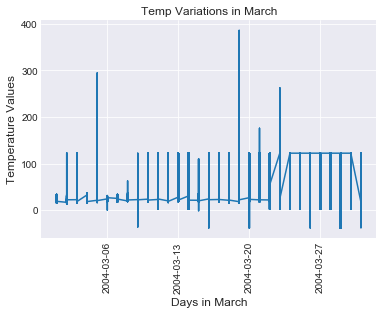

In [292]:
df = MarchData.sort_values('Date', ascending=True)
sns.set_style("darkgrid")
plt.plot(df['Date'], df['temperature'])
plt.xticks(rotation='vertical')
plt.title('Temp Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Temperature Values',fontsize = 12)
plt.show()

* the values are more or less consistent with few tall peaks observed on 4 or 5 days

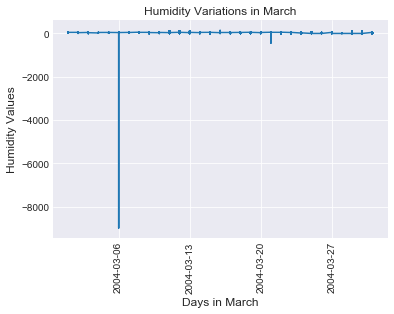

In [293]:
sns.set_style("darkgrid")
plt.plot(df['Date'], df['humidity'])
plt.xticks(rotation='vertical')
plt.title('Humidity Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Humidity Values',fontsize = 12)
plt.show()

* It is difficult to infer from this scale because of a large outlier but the values seems to be around each other

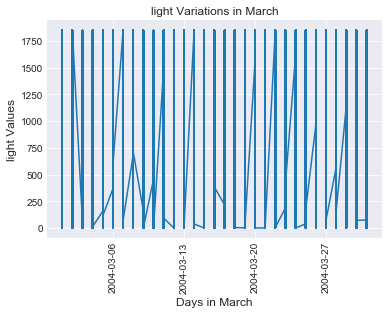

In [294]:
sns.set_style("darkgrid")
plt.plot(df['Date'], df['light'])
plt.xticks(rotation='vertical')
plt.title('light Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('light Values',fontsize = 12)
plt.show()

- Uniform variations of light values with days in March

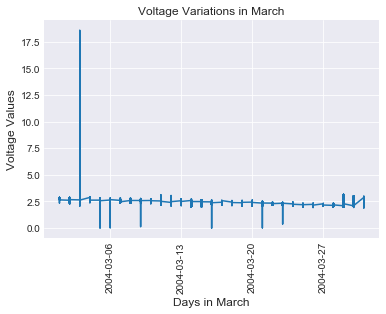

In [295]:
sns.set_style("darkgrid")
plt.plot(df['Date'], df['voltage'])
plt.xticks(rotation='vertical')
plt.title('Voltage Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Voltage Values',fontsize = 12)
plt.show()

* The values are around 2.5 but there were days when thte voltage value recorded was out of range(2 V -3 V)

In [298]:
data.dtypes

Date           datetime64[ns]
epoch                   int64
moteid                float64
temperature           float64
humidity              float64
light                 float64
voltage               float64
hour                   object
CovnHour               object
dtype: object

In [299]:
MarchData['CovnHour'] = pd.to_datetime(MarchData['time'],format= '%H:%M:%S.%f',infer_datetime_format=True)
#allow the framework to infer the date
#all the timestamps are converted to datetime where the current date is appended
#discard the current date


C:\Users\adith\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [309]:
MarchData['Hour'] = MarchData['CovnHour'].dt.hour

MarchData['Hour']

C:\Users\adith\Anaconda2\envs\py35\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0           3
2410        3
2416        3
2500        4
2503        4
2508        4
2519        4
2520        4
2533        4
3054        0
3055        0
3056        0
3057        0
3058        0
3059        0
3060        0
3061        0
3062        0
3063        0
3064        0
3065        0
3066        0
3067        0
3068        0
3069        0
3070        0
3071        0
3072        0
3073        0
3074        0
           ..
2313548    20
2313549    20
2313550    20
2313551    20
2313552    20
2313553    20
2313554    20
2313555    20
2313556    20
2313557    20
2313558    20
2313559    21
2313560    21
2313561    21
2313562    21
2313563    21
2313564    21
2313565    21
2313566    21
2313567    21
2313568    21
2313569    21
2313570    21
2313571    22
2313572    22
2313573    22
2313574    22
2313575    22
2313576    22
2313577    22
Name: Hour, Length: 2098459, dtype: int64

In [312]:
MarchData.dtypes

Date           datetime64[ns]
time                   object
epoch                   int64
moteid                float64
temperature           float64
humidity              float64
light                 float64
voltage               float64
CovnHour       datetime64[ns]
Hour                    int64
dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

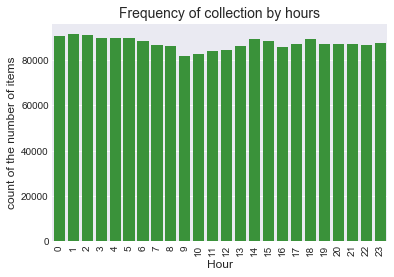

In [313]:
sns.countplot(x = "Hour",data = MarchData,color = color[2])
plt.ylabel('count of the number of items',fontsize = 12)
plt.xlabel('Hour',fontsize = 12)
plt.title('Frequency of collection by hours',fontsize = 14)
plt.xticks(rotation= 'vertical')

* The plot is mainly to check the number of observations by hour
* looks like a uniform collection
* Note - the sensor reading between x hours - y hours is considered at the x(th) hour

In [326]:
MarchData

,Date,time,epoch,moteid,temperature,humidity,light,voltage,CovnHour,Hour,only_date
0,2004-03-31,03:38:15.757551,2,1.000,122.153,-3.919,11.040,2.034,2018-03-08 03:38:15.757551,3,2004-03-31
2410,2004-03-31,03:22:19.705081,4611,1.000,122.153,-3.919,10.120,2.048,2018-03-08 03:22:19.705081,3,2004-03-31
2416,2004-03-31,03:26:15.556275,4619,1.000,122.153,-3.919,10.120,2.048,2018-03-08 03:26:15.556275,3,2004-03-31
2500,2004-03-31,04:31:15.650149,4749,1.000,121.997,-1.419,9.200,2.013,2018-03-08 04:31:15.650149,4,2004-03-31
2503,2004-03-31,04:35:02.327003,4756,1.000,121.977,-0.458,9.200,2.013,2018-03-08 04:35:02.327003,4,2004-03-31
2508,2004-03-31,04:38:45.982845,4764,1.000,121.918,4.774,9.200,2.013,2018-03-08 04:38:45.982845,4,2004-03-31
2519,2004-03-31,04:49:51.67373,4786,1.000,122.153,8.673,9.200,2.006,2018-03-08 04:49:51.673730,4,2004-03-31
2520,2004-03-31,04:50:21.140853,4787,1.000,121.526,7.198,9.200,2.006,2018-03-08 04:50:21.140853,4,2004-03-31
2533,2004-03-31,04:59:46.620093,4806,1.000,121.997,14.946,8.280,2.006,2018-03-08 04:59:46.620093,4,2004-03-31
3054,2004-03-01,00:01:57.13085,5648,1.000,18.450,43.119,43.240,2.675,2018-03-08 00:01:57.130850,0,2004-03-01


In [330]:
copy_march = MarchData.copy()

In [332]:
copy_march.dropna(inplace = True)

In [333]:
copy_march.isnull().sum()

Date           0
time           0
epoch          0
moteid         0
temperature    0
humidity       0
light          0
voltage        0
CovnHour       0
Hour           0
only_date      0
dtype: int64

In [366]:
MarchData['moteid'].value_counts()

31.000       61620
29.000       58881
23.000       55814
26.000       55734
22.000       55175
21.000       53715
48.000       52775
36.000       52655
47.000       52099
24.000       51199
7.000        48726
45.000       48343
46.000       48217
35.000       47491
25.000       47242
34.000       44730
9.000        44495
44.000       44453
38.000       43939
2.000        43681
3.000        43103
37.000       42185
28.000       41940
10.000       41843
40.000       41714
32.000       41349
42.000       41056
1.000        40002
4.000        39837
51.000       38695
             ...  
49.000       38194
43.000       37012
19.000       36778
30.000       36721
41.000       36452
27.000       35705
33.000       33715
6.000        33314
54.000       32479
16.000       31541
52.000       31495
17.000       31016
18.000       30597
13.000       29469
14.000       29014
39.000       28749
53.000       25708
20.000       24259
12.000       21224
8.000        13529
50.000       13054
58.000      

In [367]:
Mote31 = MarchData.loc[MarchData['moteid'] == 31.000]


In [369]:
Mote31.shape

(61620, 11)

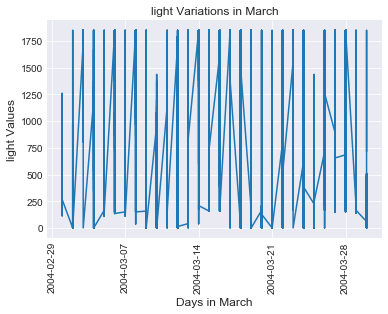

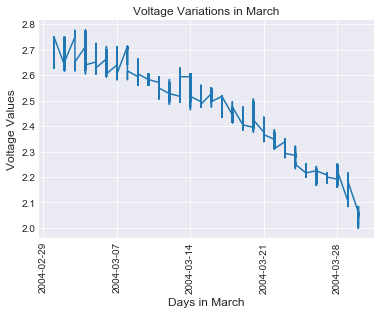

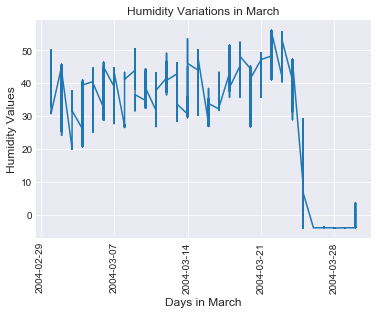

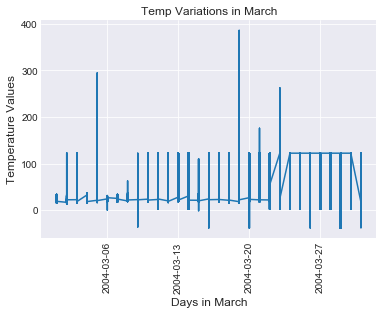

In [371]:
df = Mote31.sort_values('Date', ascending=True)
sns.set_style("darkgrid")
plt.plot(df['Date'], df['light'])
plt.xticks(rotation='vertical')
plt.title('light Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('light Values',fontsize = 12)
plt.show()

sns.set_style("darkgrid")
plt.plot(df['Date'], df['voltage'])
plt.xticks(rotation='vertical')
plt.title('Voltage Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Voltage Values',fontsize = 12)
plt.show()

sns.set_style("darkgrid")
plt.plot(df['Date'], df['humidity'])
plt.xticks(rotation='vertical')
plt.title('Humidity Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Humidity Values',fontsize = 12)
plt.show()


df = MarchData.sort_values('Date', ascending=True)
sns.set_style("darkgrid")
plt.plot(df['Date'], df['temperature'])
plt.xticks(rotation='vertical')
plt.title('Temp Variations in March',fontsize = 12)
plt.xlabel('Days in March',fontsize = 12)
plt.ylabel('Temperature Values',fontsize = 12)
plt.show()



### Observations for mote 31 which has the largest number of recordings
* Humidity is up and down with lots of peaks and crests. It falls off during the last 10 days in march
* Voltage values drop with days in March
* Peak outlier for temperature value is from this mote. There is almost a steady variation in temperature values
* light variations looks similar with the overall variations observed before

In [372]:
Mote31.columns

Index(['Date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light',
       'voltage', 'CovnHour', 'Hour', 'only_date'],
      dtype='object')

In [391]:
Mote31.columns

Index(['Date', 'time', 'epoch', 'moteid', 'temperature', 'humidity', 'light',
       'voltage', 'CovnHour', 'Hour', 'only_date'],
      dtype='object')

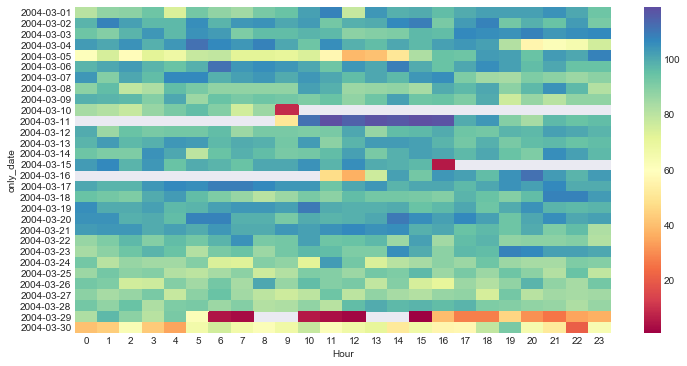

In [395]:
Heatmapseries = Mote31.groupby(['only_date','Hour'])["epoch"].count()    
Mote31heatmap = Heatmapseries.reset_index()
Mote31heatmapPivot = Mote31heatmap.pivot('only_date','Hour','epoch')
plt.figure(figsize=(12,6))
sns.heatmap(Mote31heatmapPivot,cmap = 'Spectral')

### Observations for mote 31
* There are white patches on few days, for eg:2004-03-16 where there are no observations from 0 hours to 12 hours
* During the last few days of march, the number of epochs is slightly reduced. It is very low on 2004-03-29
* Peak observation count was between 10(th) hour to 16(th) hours on 2004-03-11

In [412]:
#To illustrate that the values are missing for hours before 11
import datetime
Mote31heatmap.loc[Mote31heatmap['only_date'] == datetime.date(2004, 3, 16)]

,only_date,Hour,epoch
330,2004-03-16,11,48
331,2004-03-16,12,37
332,2004-03-16,13,77
333,2004-03-16,14,102
334,2004-03-16,15,93
335,2004-03-16,16,104
336,2004-03-16,17,102
337,2004-03-16,18,96
338,2004-03-16,19,105
339,2004-03-16,20,112


In [414]:
#Examining during the peak (10th hour to 16th hour) recordings on 2004-03-11

In [443]:
PeakDF = MarchData.loc[(MarchData['only_date'] == datetime.date(2004, 3, 11)) & (MarchData['Hour'] >9) & (MarchData['Hour'] < 17)]

In [444]:
PeakDF= PeakDF[['temperature','humidity','voltage','light','Hour']]

In [425]:
PeakDF.shape

(26567, 5)

In [437]:
ValuesDuringTenthHour = PeakDF[PeakDF['Hour'] == 10]

ValuesDuringTenthHour = ValuesDuringTenthHour[['temperature','light','voltage','humidity','epoch']]

ValuesDuringTenthHour

In [441]:
ValuesDuringTenthHour

,temperature,light,voltage,humidity,epoch
24070,22.007,537.280,2.538,35.161,35645
24071,22.056,537.280,2.538,35.022,35646
24072,21.997,566.720,2.538,34.987,35647
24073,22.056,566.720,2.538,34.849,35648
24074,22.076,566.720,2.527,35.196,35649
24075,22.056,566.720,2.538,35.161,35650
24076,22.046,566.720,2.527,35.092,35651
24077,22.066,566.720,2.527,35.022,35652
24078,21.997,566.720,2.538,35.022,35653
24079,21.988,566.720,2.538,35.092,35654


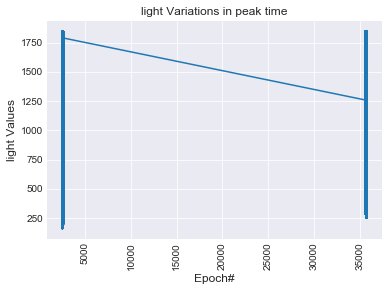

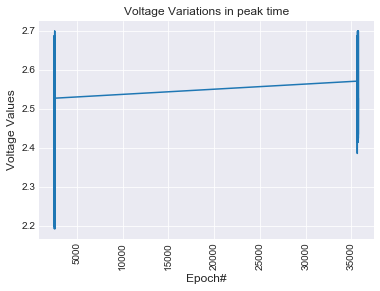

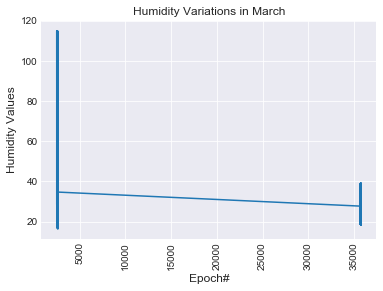

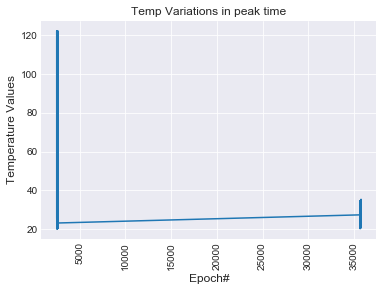

In [450]:
df = ValuesDuringTenthHour.sort_values('epoch', ascending=True)
sns.set_style("darkgrid")
plt.plot(df['v'], df['light'])
plt.xticks(rotation='vertical')
plt.title('light Variations in peak time',fontsize = 12)
plt.xlabel('Epoch#',fontsize = 12)
plt.ylabel('light Values',fontsize = 12)
plt.show()

sns.set_style("darkgrid")
plt.plot(df['epoch'], df['voltage'])
plt.xticks(rotation='vertical')
plt.title('Voltage Variations in peak time',fontsize = 12)
plt.xlabel('Epoch#',fontsize = 12)
plt.ylabel('Voltage Values',fontsize = 12)
plt.show()

sns.set_style("darkgrid")
plt.plot(df['epoch'], df['humidity'])
plt.xticks(rotation='vertical')
plt.title('Humidity Variations in March',fontsize = 12)
plt.xlabel('Epoch#',fontsize = 12)
plt.ylabel('Humidity Values',fontsize = 12)
plt.show()

sns.set_style("darkgrid")
plt.plot(df['epoch'], df['temperature'])
plt.xticks(rotation='vertical')
plt.title('Temp Variations in peak time',fontsize = 12)
plt.xlabel('Epoch#',fontsize = 12)
plt.ylabel('Temperature Values',fontsize = 12)
plt.show()

* With time(epoch) in the tenth hour, light  and humidity decreases whereas temp and voltage increases

In [ ]:
# sns.swarmplot(x="Hour", y="temperature", data=PeakDF)